In [41]:
from rocketpy.Function import Function, PiecewiseFunction
import numpy as np
import matplotlib.pyplot as plt

In [121]:
top_endcap = lambda y: np.sqrt(0.0775 ** 2 - (y - 0.692300000000001) ** 2)
bottom_endcap = lambda y: np.sqrt(0.0775 ** 2 - (0.0775 - y) **2)
tank_geometry = {(0, 0.0559): bottom_endcap, (.0559, 0.7139): lambda y: 0.0744, (0.7139, 0.7698): top_endcap}

In [122]:
tank_rad = PiecewiseFunction(tank_geometry, inputs=["Height"], outputs=["Radius"])
tank_rad(0.784)

1.239044097778394e-08

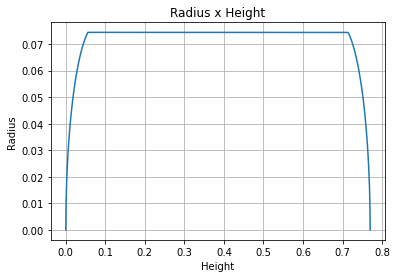

In [123]:
tank_rad.plot1D()

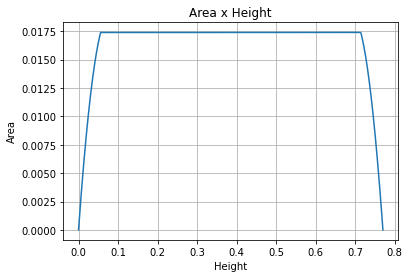

In [124]:
tank_area = np.pi * tank_rad ** 2
tank_area.setOutputs(["Area"])
tank_area()

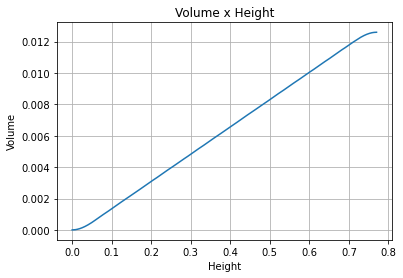

In [126]:
tank_vol = tank_area.integralFunction()
tank_vol.setOutputs(["Volume"])
tank_vol()

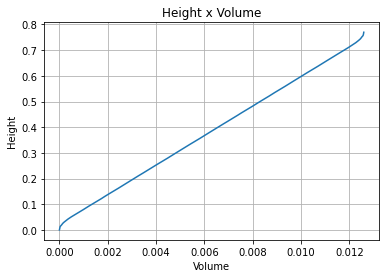

In [127]:
tr = tank_vol.reverse()
tr()

In [21]:
f1 = Function(lambda x: 1, inputs=["Time"], outputs=["Mass"])
f2 = Function(lambda x: 2, inputs=["Time"], outputs=["Mass"])